In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data_path = './data/dataset.csv'
para_path = './data/wind_turbine_parameters.csv'

## 读入数据

In [3]:
raw_data = pd.read_csv(data_path)
para = pd.read_csv(para_path)

In [4]:
raw_data.head()

,WindNumber,Time,WindSpeed,Power,RotorSpeed
0,1,2017/11/1 0:20,4.188333,65.750000,5.779167
1,1,2017/11/1 0:30,4.042500,120.700000,8.636500
2,1,2017/11/1 0:40,4.137368,135.157895,8.668421
3,1,2017/11/1 0:50,4.274737,157.315789,8.727895
4,1,2017/11/1 1:00,4.108947,129.894737,8.656842


In [5]:
para.head()

,Number,Width(m),Power(kW),CutInWindSpeed(m/s),CutOutWindSpeed(m/s),WheelSpeedRange(r/min)
0,1#,99.0,2000,3.0,25,8.33-16.8
1,2#,99.0,2000,3.0,25,8.33-16.8
2,3#,99.0,2000,3.0,25,8.33-16.8
3,4#,99.0,2000,3.0,25,8.33-16.8
4,5#,100.5,2000,3.0,22,5.5-19


In [6]:
para.columns

Index(['Number', 'Width(m)', 'Power(kW)', 'CutInWindSpeed(m/s)',
       'CutOutWindSpeed(m/s)', 'WheelSpeedRange(r/min)'],
      dtype='object')

In [7]:
def remove_chr(row):
    return row.iloc[0][:-1]
para['Number']=para[['Number']].apply(remove_chr, axis=1)

In [8]:
para.head()

,Number,Width(m),Power(kW),CutInWindSpeed(m/s),CutOutWindSpeed(m/s),WheelSpeedRange(r/min)
0,1,99.0,2000,3.0,25,8.33-16.8
1,2,99.0,2000,3.0,25,8.33-16.8
2,3,99.0,2000,3.0,25,8.33-16.8
3,4,99.0,2000,3.0,25,8.33-16.8
4,5,100.5,2000,3.0,22,5.5-19


In [9]:
type(para.columns.values),para.columns.values

(numpy.ndarray,
 array(['Number', 'Width(m)', 'Power(kW)', 'CutInWindSpeed(m/s)',
        'CutOutWindSpeed(m/s)', 'WheelSpeedRange(r/min)'], dtype=object))

## 合并数据

def insert_para(row):
    num = row['WindNumber']
    para_ = para.iloc[num-1,1:]
    # |print(pd.concat([row, para_]))
    return pd.concat([row, para_])
data = raw_data.apply(insert_para, axis=1)

In [11]:
print(raw_data.shape)

(497837, 5)


## 保存和导入新数据

In [13]:
# data.to_csv('./data/combined_data.csv', index=0)

In [10]:
data = pd.read_csv('./data/combined_data.csv')
data.info(),data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497837 entries, 0 to 497836
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   WindNumber              497837 non-null  int64  
 1   Time                    497837 non-null  object 
 2   WindSpeed               497837 non-null  float64
 3   Power                   497837 non-null  float64
 4   RotorSpeed              497837 non-null  float64
 5   Width(m)                497837 non-null  float64
 6   Power(kW)               497837 non-null  int64  
 7   CutInWindSpeed(m/s)     497837 non-null  float64
 8   CutOutWindSpeed(m/s)    497837 non-null  int64  
 9   WheelSpeedRange(r/min)  497837 non-null  object 
dtypes: float64(5), int64(3), object(2)
memory usage: 38.0+ MB


(None,
    WindNumber            Time  WindSpeed       Power  RotorSpeed  Width(m)  \
 0           1  2017/11/1 0:20   4.188333   65.750000    5.779167      99.0   
 1           1  2017/11/1 0:30   4.042500  120.700000    8.636500      99.0   
 2           1  2017/11/1 0:40   4.137368  135.157895    8.668421      99.0   
 3           1  2017/11/1 0:50   4.274737  157.315789    8.727895      99.0   
 4           1  2017/11/1 1:00   4.108947  129.894737    8.656842      99.0   
 
    Power(kW)  CutInWindSpeed(m/s)  CutOutWindSpeed(m/s) WheelSpeedRange(r/min)  
 0       2000                  3.0                    25              8.33-16.8  
 1       2000                  3.0                    25              8.33-16.8  
 2       2000                  3.0                    25              8.33-16.8  
 3       2000                  3.0                    25              8.33-16.8  
 4       2000                  3.0                    25              8.33-16.8  )

## 可视化数据

### Time-WindSpeed

In [12]:
group_data = data.groupby('WindNumber')

In [29]:
rotor_cnt = group_data['WindNumber'].count()
type(rotor_cnt), rotor_cnt.values.shape,rotor_cnt, rotor_cnt.values

(pandas.core.series.Series,
 (12,),
 WindNumber
 1     40727
 2     38855
 3     38995
 4     44335
 5     50962
 6     45592
 7     43324
 8     38470
 9     42824
 10    30184
 11    36848
 12    46721
 Name: WindNumber, dtype: int64,
 array([40727, 38855, 38995, 44335, 50962, 45592, 43324, 38470, 42824,
        30184, 36848, 46721]))

In [30]:
rotor_data = data

- 无法直接根据`Time`或者时间对应的index可视化所有数据，从[dataset](data/dataset.csv)中可以发现不同风电机的运行时间不同：

| Number | Start Time     | End Time          |
| ------ | -------------- | ----------------- |
| 1      | 2017/11/1 0:20 | 2017/11/1 0:20    |
| 2      | 2017/11/1 0:10 | 2017/11/1 0:10    |
| 3      | 2017/11/1 0:10 | 2018/10/30 23:500 |
| 4      | 2018/11/1 0:00 | 2019/10/17 14:50  |
| 5      | 2019/1/2 11:40 | 2017/11/1 0:10    |


- 如下的方式无法使用，可将Time映射到index

`sns.relplot(x='Time' , y='WindSpeed', hue='WindNumber',kind='line',data=rotor_data)`

In [39]:
group_data.get_group(1)

,Time,WindSpeed,Power,RotorSpeed,Width(m),Power(kW),CutInWindSpeed(m/s),CutOutWindSpeed(m/s),WheelSpeedRange(r/min)
0,2017/11/1 0:20,4.188333,65.750000,5.779167,99.0,2000,3.0,25,8.33-16.8
1,2017/11/1 0:30,4.042500,120.700000,8.636500,99.0,2000,3.0,25,8.33-16.8
2,2017/11/1 0:40,4.137368,135.157895,8.668421,99.0,2000,3.0,25,8.33-16.8
3,2017/11/1 0:50,4.274737,157.315789,8.727895,99.0,2000,3.0,25,8.33-16.8
4,2017/11/1 1:00,4.108947,129.894737,8.656842,99.0,2000,3.0,25,8.33-16.8
...,...,...,...,...,...,...,...,...,...
40722,2018/10/30 23:10,6.040000,457.842105,10.930000,99.0,2000,3.0,25,8.33-16.8
40723,2018/10/30 23:20,6.124118,482.294118,11.107059,99.0,2000,3.0,25,8.33-16.8
40724,2018/10/30 23:30,6.464000,567.500000,11.586500,99.0,2000,3.0,25,8.33-16.8
40725,2018/10/30 23:40,6.559000,578.200000,11.669000,99.0,2000,3.0,25,8.33-16.8


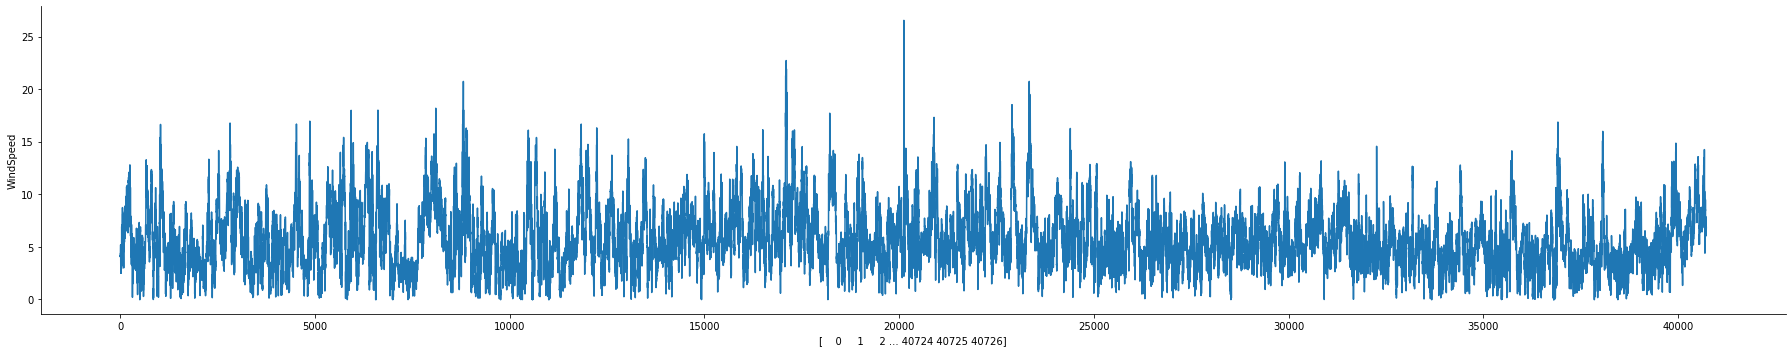

In [46]:
g_idx = 0
g_data = group_data.get_group(g_idx+1)
sns.relplot(x=np.arange(rotor_cnt.values[g_idx]) , y='WindSpeed', kind='line',data=g_data, aspect=5)